In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import random
from sklearn.metrics import silhouette_score


In [2]:
# import raw data
df = pd.read_csv('https://raw.githubusercontent.com/rua02me/311_Service_Requests_from_2020_to_Present/main/lab4_4_6.csv')

In [3]:
del df['Cluster Labels']

In [4]:
df

,Descriptor,Duration Type,Resolved Type,Location Type,Segment
0,Noise,"(0.069, 26.55]",fixed,Street/Sidewalk,5
1,Noise,"(0.069, 26.55]",fixed,Street/Sidewalk,5
2,Noise,"(0.069, 26.55]",no_violation,Street/Sidewalk,1
3,Other,"(0.069, 26.55]",no_violation,Street/Sidewalk,1
4,Noise,"(0.069, 26.55]",no_violation,Residential Building/House,4
...,...,...,...,...,...
30424,Other,"(2677.65, 59476.62]",fixed,Residential Building/House,2
30425,Animals,"(2677.65, 59476.62]",fixed,Residential Building/House,2
30426,Animals,"(2677.65, 59476.62]",no_violation,Residential Building/House,2
30427,House,"(2677.65, 59476.62]",fixed,Residential Building/House,2


In [5]:
df['Segment'].value_counts()

1    9406
2    5892
5    5190
3    4526
4    3384
6    2031
Name: Segment, dtype: int64

In [6]:
cluster_1 = df[df['Segment']==1]
cluster_2 = df[df['Segment']==2]
cluster_3 = df[df['Segment']==3]
cluster_4 = df[df['Segment']==4]
cluster_5 = df[df['Segment']==5]
cluster_6 = df[df['Segment']==6]




> **Cluster1,4,5:** They are all noise related, with different duration type. Compare cluster 5 and cluster 1, which have the same location type, we can tell that if the case can be fixed, it will be solved in a short time, however, if it is a case that hard to say it violate some laws or regulations, more investigation effort need to be made, hence result in a longer duration type; For cluster4, which happened in residential building or house, it mostly be the noise among neighbourhood so it hard to define it has violations and then result in a little longer period, but also because it happend in residential building involed with limited liability party, so it still in a short duration kind.


>**Cluster3,6:** These are two traffic related clusters with same location type but different duration and also resolved type; For cluster6, it could more be related with parking issues which have a shorter handling period; As for cluster3, it includes more of road issue, to solve those, more departments will be involved and result in a longer processing time.


> **Cluster2:** For this cluster, because of the nature of the cases, which need permission to come into the home or room to solve, it will require a rather long processing time. And most of them are not very serious things, which result in a resolved type of no_violation.


In [7]:
%pip install gower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4232 sha256=d710be0fbaad3fcb048bdd225cc5c54a79fbd1523e5e857e24fdfc54c93a81cd
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


In [8]:
import gower

distance_matrix1 = gower.gower_matrix(cluster_1)
distance_matrix2 = gower.gower_matrix(cluster_2)
distance_matrix3 = gower.gower_matrix(cluster_3)
distance_matrix4 = gower.gower_matrix(cluster_4)
distance_matrix5 = gower.gower_matrix(cluster_5)
distance_matrix6 = gower.gower_matrix(cluster_6)



In [9]:
dis_mean = [distance_matrix1.mean(),distance_matrix2.mean(),distance_matrix3.mean(),distance_matrix4.mean(),distance_matrix5.mean(),distance_matrix6.mean()]

In [10]:
A = ['distance']
B=['cluster_1','cluster_2','cluster_3','cluster_4','cluster_5','cluster_6']

dfm=pd.DataFrame(dis_mean, columns=A)
dfm.index=B
dfm

,distance
cluster_1,0.402854
cluster_2,0.370698
cluster_3,0.332130
cluster_4,0.331117
cluster_5,0.274846
cluster_6,0.267534


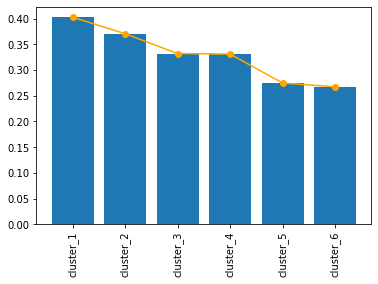

In [11]:
names = list(B)
values = list(dis_mean)

plt.xticks(rotation = 90)
plt.bar(names, values)
plt.plot(names, values, '-o', color='orange')

In [12]:
total_dist = gower.gower_matrix(df)


In [13]:
score = silhouette_score(total_dist, df['Segment'], metric='precomputed')

In [14]:
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.349


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

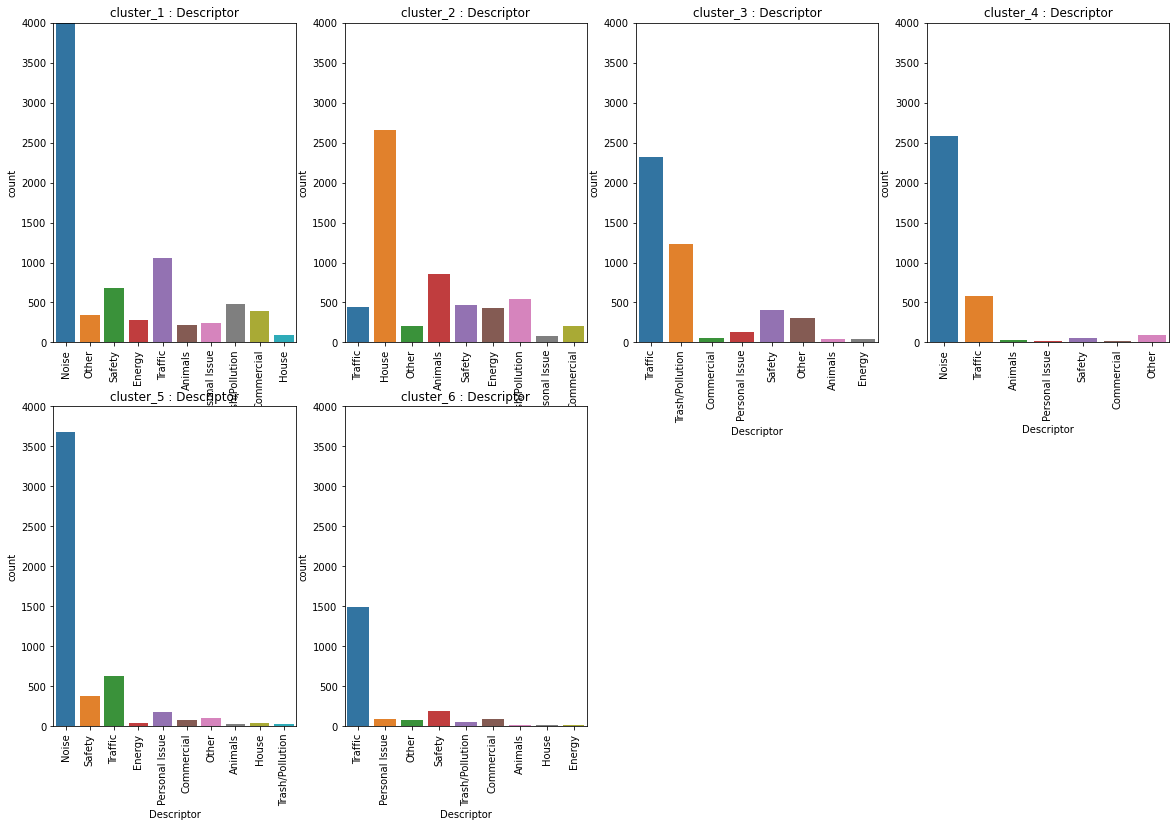

In [15]:
#Have a look at the status of tickets

plt.figure(figsize = (20, 20))
plt.subplot(3, 4, 1)
plt.ylim(0,4000)
plt.xticks(rotation = 90)
plt.title('cluster_1 : Descriptor')
sns.countplot(cluster_1['Descriptor'])

# subplot 2
plt.subplot(3, 4, 2)
plt.title('cluster_2 : Descriptor')
plt.ylim(0,4000)
plt.xticks(rotation = 90)
sns.countplot(cluster_2['Descriptor'])

# subplot 3
plt.subplot(3, 4, 3)
plt.title('cluster_3 : Descriptor')
plt.ylim(0,4000)
plt.xticks(rotation = 90)
sns.countplot(cluster_3['Descriptor'])

# subplot 4
plt.subplot(3, 4, 4)
plt.title('cluster_4 : Descriptor')
plt.ylim(0,4000)
plt.xticks(rotation = 90)
sns.countplot(cluster_4['Descriptor'])

# subplot 5
plt.subplot(3, 4, 5)
plt.title('cluster_5 : Descriptor')
plt.ylim(0,4000)
plt.xticks(rotation = 90)
sns.countplot(cluster_5['Descriptor'])

# subplot 6
plt.subplot(3, 4, 6)
plt.title('cluster_6 : Descriptor')
plt.ylim(0,4000)
plt.xticks(rotation = 90)
sns.countplot(cluster_6['Descriptor'])

plt.show()